### **Differential Scorecards**

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from ucimlrepo import fetch_ucirepo 

#### **binary data**

##### synthetic data

In [3]:
np.random.seed(0)
synth_X = np.random.rand(100)
synth_y = 2*synth_X + np.random.randn(100)

##### benchmark datasets

**iris**:

In [12]:
iris_data = load_iris()
iris_X = pd.DataFrame(iris_data.data)
iris_y = pd.DataFrame(iris_data.target)

print("num observations: ", iris_y.count())
print("target distribution: ", iris_y.value_counts())

num observations:  0    150
dtype: int64
target distribution:  0    50
1    50
2    50
Name: count, dtype: int64


**adult**: predict whether annual income of an individual exceeds $50K/yr based on census data. 

In [ ]:
# fetch dataset 
adult_data = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
adult_X = adult_data.data.features 
adult_y = adult_data.data.targets
adult_y['income'] = adult_y['income'].map({'>50K': 1, '<=50K': 0})
  
# metadata 
# print(adult_data.metadata) 
  
# variable information 
# print(adult_data.variables) 

print("num observations: ", adult_y.count())
print("target distribution: ", adult_y.value_counts())

num observations:  income    32561
dtype: int64
target distribution:  income
0.0       24720
1.0        7841
Name: count, dtype: int64


/var/folders/wk/c98ddbnx3pd7fpdy174bcjmr0000gn/T/ipykernel_6309/553420696.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_y['income'] = adult_y['income'].map({'>50K': 1, '<=50K': 0})


**mammo**: discrimination of benign and malignant mammographic masses based on BI-RADS attributes and the patient's age.

In [16]:
# fetch dataset 
mammo_data = fetch_ucirepo(id=161) 
  
# data (as pandas dataframes) 
mammo_X = mammo_data.data.features 
mammo_y = mammo_data.data.targets 
  
# metadata 
# print(mammo_data.metadata) 
  
# variable information 
# print(mammo_data.variables) 


print("num observations: ", mammo_y.count())
print("target distribution: ", mammo_y.value_counts())

num observations:  Severity    961
dtype: int64
target distribution:  Severity
0           516
1           445
Name: count, dtype: int64


**mushroom**: mushrooms described in terms of physical characteristics; classification: poisonous or edible

In [30]:
# fetch dataset 
mushroom_data = fetch_ucirepo(id=73) 


# data (as pandas dataframes) 
mushroom_X = mushroom_data.data.features 
mushroom_y = mushroom_data.data.targets 
mushroom_y['poisonous'] = mushroom_y['poisonous'].map({'p': 1, 'e': 0})
  
# metadata 
# print(mushroom_data.metadata) 
  
# variable information 
# print(mushroom_data.variables) 

print("num observations: ", mushroom_y.count())
print("target distribution: ", mushroom_y.value_counts())

num observations:  poisonous    8124
dtype: int64
target distribution:  poisonous
0            4208
1            3916
Name: count, dtype: int64


/var/folders/wk/c98ddbnx3pd7fpdy174bcjmr0000gn/T/ipykernel_6309/3297575954.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mushroom_y['poisonous'] = mushroom_y['poisonous'].map({'p': 1, 'e': 0})


**spambase**: classifying Email as Spam or Non-Spam

In [31]:
# fetch dataset 
spambase_data = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
spambase_X = spambase_data.data.features 
spambase_y = spambase_data.data.targets 
  
# metadata 
# print(spambase_data.metadata) 
  
# variable information 
# print(spambase_data.variables) 

print("num observations: ", spambase_y.count())
print("target distribution: ", spambase_y.value_counts())

num observations:  Class    4601
dtype: int64
target distribution:  Class
0        2788
1        1813
Name: count, dtype: int64


**telemarketing**: set of possible advertisements on Internet pages

In [41]:
# load dataset from file. target is last column
telemarketing_data = pd.read_csv('datasets/internet+advertisements/ad.data')
telemarketing_X = telemarketing_data.iloc[:, :-1]
telemarketing_y = telemarketing_data.iloc[:, -1]

#telemarketing_y['ad'] = telemarketing_y['ad'].map({'nonad.': 0, 'ad.': 1})


print("num observations: ", telemarketing_y.count())
print("target distribution: ", telemarketing_y.value_counts())

num observations:  3278
target distribution:  ad.
nonad.    2820
ad.        458
Name: count, dtype: int64


/var/folders/wk/c98ddbnx3pd7fpdy174bcjmr0000gn/T/ipykernel_6309/2803432592.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  telemarketing_data = pd.read_csv('datasets/internet+advertisements/ad.data')


In [21]:
sleep_apnea_data = pd.read_csv('datasets/bdsp_psg_master_20231101.csv')

#### **discretization thresholds**

CAIM

In [ ]:
# discretize using CAIM

from caimcaim import CAIMD # https://github.com/airysen/caimcaim/blob/master/caimcaim/caimcaim.py

def discretize_caim_df(data, X, y):
    caim = CAIMD()
    X_disc_caim = caim.fit_transform(X, y) # fit() and transform()
    
    print("\nCut-off points: ", caim.split_scheme)
    print("Number of bins: ", end="")
    for i, (key, value) in enumerate(caim.split_scheme.items()):
        if i == len(caim.split_scheme) - 1:
            print(f" {key}: {len(value)+1}", end="")
        else:
            print(f" {key}: {len(value)+1}", end=",")
    print()
    
    X_disc_caim = pd.DataFrame(X_disc_caim, columns=data.feature_names).astype(int) # convert to pandas dataframe and int
        
    return X_disc_caim

def discretize_caim(data, X, y):
    caim = CAIMD()
    X_disc_caim = caim.fit_transform(X, y) # fit() and transform()
    thresholds = caim.split_scheme
    return thresholds

''' prints of fit() method:
Categorical list_of_(indicies)_categorical_features
# feature_index  GLOBAL CAIM  best_caim_value 

in the returning dataframe:
    - columns represent the original features
    - rows represent each instance
    - values are the bin number each instance belongs to (starting from 0) 
'''


' prints of fit() method:\nCategorical list_of_(indicies)_categorical_features\n# feature_index  GLOBAL CAIM  best_caim_value \n\nin the returning dataframe:\n    - columns represent the original features\n    - rows represent each instance\n    - values are the bin number each instance belongs to (starting from 0) \n'

In [ ]:
iris_thresholds_caim = discretize_caim(iris_data, iris_X, iris_y)
print(iris_thresholds_caim)

Categorical []
# 0  GLOBAL CAIM  26.636271740334553
# 1  GLOBAL CAIM  17.382507167267576
# 2  GLOBAL CAIM  45.55892255892255
# 3  GLOBAL CAIM  46.16156736446592
{0: [4.3, 5.5, 6.2, 8.9], 1: [2.0, 2.9, 3.0, 5.4], 2: [1.0, 1.9, 4.7, 7.9], 3: [0.1, 0.6, 1.7, 3.5]}


infinitesimal bins

In [ ]:
# discretize using infinitesimal bins:
# thresholds are the points in between 2 consecutive values in the sorted list

def discretize_infbins(X):
    infbins_thresholds = {}
    for col in range(X.shape[1]):
        # sort 
        sorted_col = np.unique(np.sort(X.transpose()[col]))
        # get thresholds
        thresholds = []
        for i in range(len(sorted_col)-1):
            thresholds.append((sorted_col[i] + sorted_col[i+1])/2)
        infbins_thresholds[col] = thresholds

    return infbins_thresholds

In [ ]:
iris_thresholds_infbins = discretize_infbins(iris_X)
print(iris_thresholds_infbins)

{0: [4.35, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45, 5.55, 5.65, 5.75, 5.85, 5.95, 6.05, 6.15, 6.25, 6.35, 6.45, 6.55, 6.65, 6.75, 6.85, 6.95, 7.05, 7.15, 7.25, 7.35, 7.5, 7.65, 7.800000000000001], 1: [2.1, 2.25, 2.3499999999999996, 2.45, 2.55, 2.6500000000000004, 2.75, 2.8499999999999996, 2.95, 3.05, 3.1500000000000004, 3.25, 3.3499999999999996, 3.45, 3.55, 3.6500000000000004, 3.75, 3.8499999999999996, 3.95, 4.05, 4.15, 4.300000000000001], 2: [1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.7999999999999998, 2.45, 3.15, 3.4, 3.55, 3.6500000000000004, 3.75, 3.8499999999999996, 3.95, 4.05, 4.15, 4.25, 4.35, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45, 5.55, 5.65, 5.75, 5.85, 5.95, 6.05, 6.199999999999999, 6.35, 6.5, 6.65, 6.800000000000001], 3: [0.15000000000000002, 0.25, 0.35, 0.45, 0.55, 0.8, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.1500000000000004, 2.25, 2.3499999999999996, 2.45]}


#### discretized version

colunas novas = (num intervalos + 1)*num features

In [ ]:
# create new df with columns = (num of bins + 1) * num of features
# (filled with 0)

def get_discretized_cols(X, thresholds):
    col_names = []
    for col in range(X.shape[1]):
        for bin in range(len(thresholds[col]) + 1):
            new_col_name = 'feat' + str(col) + '-bin' + str(bin)
            col_names.append(new_col_name)
    
    X_disc = pd.DataFrame(columns=col_names)
    for i in range(len(X)):
        X_disc.loc[i] = 0
    
    return X_disc
    

In [ ]:
iris_X_disc = get_discretized_cols(iris_X, iris_thresholds_infbins)
iris_X_disc.head()

,feat0-bin0,feat0-bin1,feat0-bin2,feat0-bin3,feat0-bin4,feat0-bin5,feat0-bin6,feat0-bin7,feat0-bin8,feat0-bin9,...,feat3-bin12,feat3-bin13,feat3-bin14,feat3-bin15,feat3-bin16,feat3-bin17,feat3-bin18,feat3-bin19,feat3-bin20,feat3-bin21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- 1 out of k: preencher com bools (de pertencer ao intervalo)
- differential coding: 1 até ao bool

In [ ]:
# given thresholds of a feature and a value
# return index of bin the values belongs to
def get_bin(thresholds, value):
    if(value < thresholds[0]):
        return 0
    if(value >= thresholds[len(thresholds)-1]):
        return len(thresholds)
    for i in range(len(thresholds)-1):
        if(value >= thresholds[i] and value < thresholds[i+1]):
            return i


# 1 out of k
def disc_1_out_of_k(X, thresholds):
    new_df = get_discretized_cols(X, thresholds)
    # iterate through features
    for instance in range(X.shape[0]):
        for col in range(X.shape[1]):
            bin = get_bin(thresholds[col], X[instance][col])
            new_df['feat' + str(col) + '-bin' + str(bin)][instance] = 1
    return new_df

# 1 out of k
# but take out 1st bin
def disc_1_out_of_k_V2(X, thresholds):
    new_df = get_discretized_cols(X, thresholds)
    col_names = []
    # delete columns of 1st bin for each feature
    for col in range(X.shape[1]):
        col_names.append('feat' + str(col) + '-bin' + str(0))
    new_df = new_df.drop(columns=col_names)
    
    # go through all instances
    for instance in range(X.shape[0]):
        # go through each feature
        for col in range(X.shape[1]):
            bin = get_bin(thresholds[col], X[instance][col])
            if(bin == 0): continue
            new_df['feat' + str(col) + '-bin' + str(bin)][instance] = 1
    return new_df


# differential coding
def disc_diff_coding(X, thresholds):
    new_df = get_discretized_cols(X, thresholds)
    # iterate through features
    for instance in range(X.shape[0]):
        for col in range(X.shape[1]):
            bin = get_bin(thresholds[col], X[instance][col])
            for i in range(0, bin+1):
                new_df['feat' + str(col) + '-bin' + str(i)][instance] = 1
    return new_df
            
def disc_diff_coding_V2(X, thresholds):
    new_df = get_discretized_cols(X, thresholds)
    
    col_names = []
    # delete columns of 1st bin for each feature
    for col in range(X.shape[1]):
        col_names.append('feat' + str(col) + '-bin' + str(0))
    new_df = new_df.drop(columns=col_names)
    
    # iterate through features
    for instance in range(X.shape[0]):
        for col in range(X.shape[1]):
            bin = get_bin(thresholds[col], X[instance][col])
            if(bin == 0): continue
            for i in range(1, bin+1):
                new_df['feat' + str(col) + '-bin' + str(i)][instance] = 1
    return new_df

In [ ]:
iris_X_disc_infbins_1outofk = disc_1_out_of_k(iris_X, iris_thresholds_infbins)
iris_X_disc_infbins_1outofk.head()

,feat0-bin0,feat0-bin1,feat0-bin2,feat0-bin3,feat0-bin4,feat0-bin5,feat0-bin6,feat0-bin7,feat0-bin8,feat0-bin9,...,feat3-bin12,feat3-bin13,feat3-bin14,feat3-bin15,feat3-bin16,feat3-bin17,feat3-bin18,feat3-bin19,feat3-bin20,feat3-bin21
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
iris_X_disc_infbins_1outofk_V2 = disc_1_out_of_k_V2(iris_X, iris_thresholds_infbins)
iris_X_disc_infbins_1outofk_V2.head()

,feat0-bin1,feat0-bin2,feat0-bin3,feat0-bin4,feat0-bin5,feat0-bin6,feat0-bin7,feat0-bin8,feat0-bin9,feat0-bin10,...,feat3-bin12,feat3-bin13,feat3-bin14,feat3-bin15,feat3-bin16,feat3-bin17,feat3-bin18,feat3-bin19,feat3-bin20,feat3-bin21
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
iris_X_disc_infbins_diff_coding = disc_diff_coding(iris_X, iris_thresholds_infbins)
iris_X_disc_infbins_diff_coding.head()

,feat0-bin0,feat0-bin1,feat0-bin2,feat0-bin3,feat0-bin4,feat0-bin5,feat0-bin6,feat0-bin7,feat0-bin8,feat0-bin9,...,feat3-bin12,feat3-bin13,feat3-bin14,feat3-bin15,feat3-bin16,feat3-bin17,feat3-bin18,feat3-bin19,feat3-bin20,feat3-bin21
0,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
iris_X_disc_infbins_diff_coding_V2 = disc_diff_coding_V2(iris_X, iris_thresholds_infbins)
iris_X_disc_infbins_diff_coding_V2.head()

,feat0-bin1,feat0-bin2,feat0-bin3,feat0-bin4,feat0-bin5,feat0-bin6,feat0-bin7,feat0-bin8,feat0-bin9,feat0-bin10,...,feat3-bin12,feat3-bin13,feat3-bin14,feat3-bin15,feat3-bin16,feat3-bin17,feat3-bin18,feat3-bin19,feat3-bin20,feat3-bin21
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### objective function

- Least Squares (RSS)
- Maximum Likelihood (GLM with binomial response and logit link function)
- margin maximization (linear SVM).

In [ ]:
# RSS
from scipy.optimize import least_squares
# call least_squares(fun, x0)

# maximum likelihood
from scipy.optimize import minimize
def max_lik(parameters):
    m = parameters[0]
    b = parameters[1]
    sigma = parameters[2]
    for i in np.arange(0, len(x)):
        y_exp = m * x + b
    L = (len(x)/2 * np.log(2 * np.pi) + len(x)/2 * np.log(sigma ** 2) + 1 /
         (2 * sigma ** 2) * sum((y - y_exp) ** 2))
    return L

x = 1
y = 2
lik_model = minimize(max_lik, 0, method='L-BFGS-B')


#### regularization

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.7).fit(iris_X, iris_y)
print(f"Ridge Regression-Training set score: {ridge.score(iris_X, iris_y):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(iris_X, iris_y):.2f}")

Ridge Regression-Training set score: 0.93
Ridge Regression-Test set score: 0.93


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01).fit(iris_X, iris_y)
print(f"Lasso Regression-Training set score: {lasso.score(iris_X, iris_y):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(iris_X, iris_y):.2f}")
print(f"Number of features Lasso: {sum(lasso.coef_ != 0)}")

Lasso Regression-Training set score: 0.93
Lasso Regression-Test set score: 0.93
Number of features Lasso: 3


In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(iris_X, iris_y)
print(f"Elastic Net-Training set score: {elastic_net.score(iris_X, iris_y):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(iris_X, iris_y):.2f}")

Elastic Net-Training set score: 0.93
Elastic Net-Test set score: 0.93


#### **Ordinal data**

In [ ]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,cEMDb Value,cEMDLab Value,sX2L Value,sX2a Value,sX2b Value,sX2Lab Value,sEMDL Value,sEMDa Value,sEMDb Value,sEMDLab Value
0,Good,1.149009,0.830915,0.107618,0.938534,1.934477,4.885198,17.296370,0.049401,0.033356,...,0.291363,0.210082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Good,2.368824,1.326447,1.599444,0.272997,0.035378,19.932998,68.761479,0.113919,0.058509,...,0.351693,0.105346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Good,1.409939,0.950935,0.278358,1.229293,2.221074,22.277770,38.323430,0.067231,0.038613,...,0.304185,0.049345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Good,2.059918,0.720926,1.786307,1.065381,1.995007,25.163410,31.631070,0.100705,0.032141,...,0.137693,0.031455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Good,2.452595,0.798596,1.868745,1.070148,1.218189,0.395585,31.426783,0.117249,0.035235,...,0.091768,0.030546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
a = aesthetic_evaluation_data[['sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value']]
a.sum()

sX2L Value       0.0
sX2a Value       0.0
sX2b Value       0.0
sX2Lab Value     0.0
sEMDL Value      0.0
sEMDa Value      0.0
sEMDb Value      0.0
sEMDLab Value    0.0
dtype: float64

In [ ]:
aesthetic_evaluation_y.value_counts()

Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Subjective Evaluation')

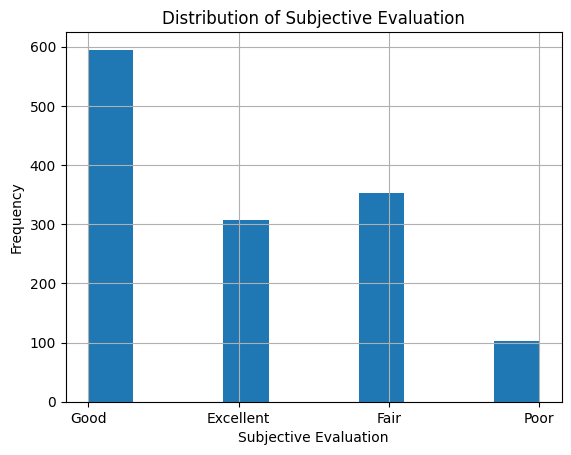

In [ ]:
import matplotlib.pyplot as plt

aesthetic_evaluation_y.hist()
plt.xlabel('Subjective Evaluation')
plt.ylabel('Frequency')
plt.title('Distribution of Subjective Evaluation')